In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error


c:\users\big data\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv(r'./prediction_v3.csv')
data = df[['median','average','Follow',"stream_first",'prediction']]
x = data[['median','average','Follow','stream_first','prediction']]
print('原始資料筆數: ',len(df))

y = x['prediction']
y

原始資料筆數:  6730


0       291377
1        77519
2       152994
3       117170
4        55154
         ...  
6725        97
6726       321
6727       193
6728        95
6729       278
Name: prediction, Length: 6730, dtype: int64

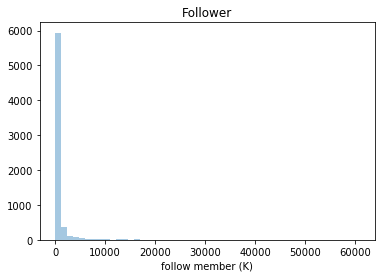

In [4]:
#查看資料特性
sns.distplot(x["stream_first"], kde=False)
plt.xlabel("follow member (K)")
plt.title('Follower')
plt.show()

0        196
1       1517
2        188
3         77
4        226
        ... 
6725       0
6726       0
6727       0
6728       0
6729      45
Name: stream_first, Length: 6730, dtype: int64


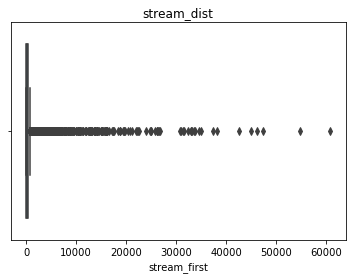

In [5]:
print(x['stream_first'])
sns.boxplot(x['stream_first'])
plt.title('stream_dist')
plt.xlabel("stream_first")
plt.show()

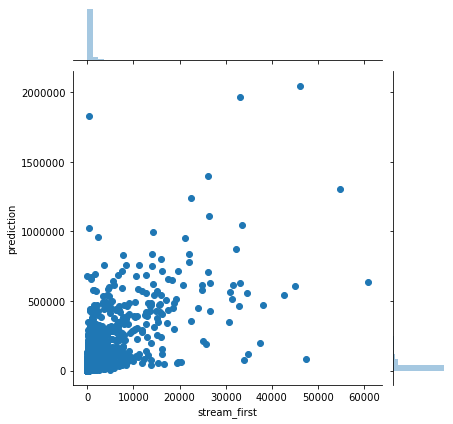

In [6]:
sns.jointplot(x="stream_first", y="prediction", data=x);
plt.show()

In [7]:
xc = data[['median','average','Follow','stream_first']]#data[]#,'stream_high','median',
yc = x['prediction']
print(yc)

0       291377
1        77519
2       152994
3       117170
4        55154
         ...  
6725        97
6726       321
6727       193
6728        95
6729       278
Name: prediction, Length: 6730, dtype: int64


In [8]:
model = LinearRegression(n_jobs = 1)
RF_model = RandomForestRegressor(n_estimators=200, max_features='auto', oob_score=True)
KNN_model = KNeighborsRegressor(n_neighbors=2)
XGBoost_model = xgb.XGBRegressor()
DT_model = DecisionTreeRegressor()#random_state = 0,,max_leaf_nodes = None,max_depth=5



In [9]:
L_rg_list = []; RF_rg_list = [] ; DT_rg_list = [] ;KNN_rg_list = [];SVR_rg_list = [] ; XGB_rg_list = []
for i in range(8):
    x_train,x_test,y_train,y_test = train_test_split(xc,yc,test_size=0.2, random_state=i)
    #開始訓練
    model.fit(x_train,y_train)
    RF_model.fit(x_train,y_train)
    KNN_model.fit(x_train,y_train)
    DT_model.fit(x_train,y_train)
    
    
    #開始預測
    predict = model.predict(x_test); L_rg_list.append(round(metrics.r2_score(y_test, predict),3))
    RF_predict = RF_model.predict(x_test); RF_rg_list.append(round(metrics.r2_score(y_test, RF_predict),3))
    KNN_predict = KNN_model.predict(x_test); KNN_rg_list.append(round(metrics.r2_score(y_test, KNN_predict),3))    
    DT_predict = DT_model.predict(x_test); DT_rg_list.append(round(metrics.r2_score(y_test, DT_predict),3))

print('R^2 of linear reg: {}, mean: {}'.format(L_rg_list, round(np.mean(L_rg_list),3)))
print('R^2 of RF reg: {}, mean: {}'.format(RF_rg_list, round(np.mean(RF_rg_list),3)))
print('R^2 of KNN reg: {}, mean: {}'.format(KNN_rg_list, round(np.mean(KNN_rg_list),3)))
print('R^2 of DT reg: {}, mean: {}'.format(DT_rg_list, round(np.mean(DT_rg_list),3)))
print(x_test)
print(y_test)

R^2 of linear reg: [0.446, 0.598, 0.572, 0.583, 0.525, 0.702, 0.555, 0.626], mean: 0.576
R^2 of RF reg: [0.572, 0.701, 0.752, 0.724, 0.639, 0.746, 0.785, 0.751], mean: 0.709
R^2 of KNN reg: [0.551, 0.552, 0.726, 0.591, 0.568, 0.596, 0.803, 0.736], mean: 0.64
R^2 of DT reg: [0.498, 0.587, 0.594, 0.583, 0.52, 0.63, 0.634, 0.604], mean: 0.581
      median  average   Follow  stream_first
2568    1018     1067    10200             0
4449   70154   202408  2010000           552
6271    1188     1744    31800             0
2712    1578     2657     5960             0
5497    9022    71036   668000            61
...      ...      ...      ...           ...
1402    7830    18964   455000           996
5319   14769   108841   718000           666
6306    1010     1258    23900            22
6182      91      624    40600             0
6455     390      660    15500             0

[1346 rows x 4 columns]
2568       662
4449    444829
6271        98
2712        53
5497     39674
         ...  
140

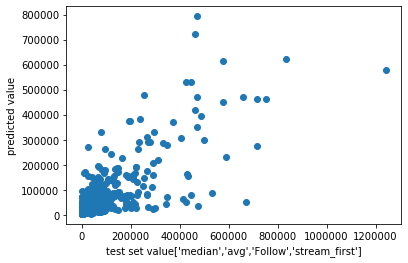

In [88]:
plt.scatter(y_test, predict)
plt.xlabel("test set value['median','average','Follow','stream_first']")
plt.ylabel("predicted value")
plt.show()

In [193]:
#######RF MAPE######
import statistics
RF_prediction= RF_model.predict(x_test)
errors = abs(RF_prediction - y_test)
mape = 100 * (errors / y_test)
print(statistics.mean(mape))


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(np.mean(mape(y_test,RF_prediction)))

235.58517906660398
235.58517906660396


In [194]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

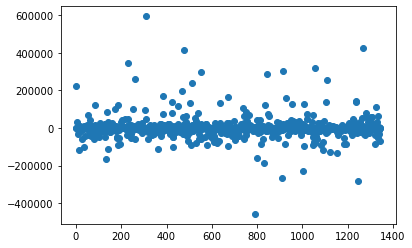

In [195]:
min(y_test - RF_prediction)

plt.scatter(np.arange(len(y_test)), y_test - RF_prediction)
plt.show()

In [196]:
#######LR MAPE######
LR_prediction= model.predict(x_test)
errors = abs(LR_prediction - y_test)
mape = 100 * (errors / y_test)
print(np.mean(mape))


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mape(y_test,LR_prediction))

4677.197106648073
4677.197106648074


In [197]:
#######KNN MAPE######
KNN_prediction= KNN_model.predict(x_test)
errors = abs(KNN_prediction - y_test)
mape = 100 * (errors / y_test)
print(np.mean(mape))
accuracy = 100 - np.mean(mape)
print(accuracy)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(np.mean(mape(y_test,KNN_prediction)))

217.10814852003895
-117.10814852003895
217.10814852003892


In [198]:
#================== 去除outlier
data = df[['median','avg','Follow','stream_first','prediction']]
x = data[['median','avg','Follow','stream_first','prediction']]
data = preprocessing.scale(x)
data = pd.DataFrame(data,columns=['median','avg','Follow','stream_first','prediction'])
data = data[np.abs(data['stream_first'])< 3];data =data[np.abs(data['Follow']) < 3]
data= data[np.abs(data['avg']<3)];data=data[np.abs(data['median'])<3]
data = data[np.abs(data['prediction']) < 3];
x = data
print('z-score絕對值<3的資料筆數: ',len(x))

xc =x[['avg','Follow',"stream_first"]]#,'stream_avg','median',
yc = x['prediction']

z-score絕對值<3的資料筆數:  6266


In [199]:
L_rg_list = []; RF_rg_list = [] ; DT_rg_list = [] ;KNN_rg_list = [];SVR_rg_list = [] ; XGB_rg_list = []
for i in range(8):
    x_train,x_test,y_train,y_test = train_test_split(xc,yc,test_size=0.2, random_state=i)
    #開始訓練
    model.fit(x_train,y_train)
    RF_model.fit(x_train,y_train)
    KNN_model.fit(x_train,y_train)
    XGBoost_model.fit(x_train,y_train)
    DT_model.fit(x_train,y_train)
#     SVR_model.fit(x_train,y_train)
    
    
    #開始預測
    predict = model.predict(x_test); L_rg_list.append(round(metrics.r2_score(y_test, predict),3))
    RF_predict = RF_model.predict(x_test); RF_rg_list.append(round(metrics.r2_score(y_test, RF_predict),3))
    KNN_predict = KNN_model.predict(x_test); KNN_rg_list.append(round(metrics.r2_score(y_test, KNN_predict),3))    
    XGB_predict = XGBoost_model.predict(x_test);XGB_rg_list.append(round(metrics.r2_score(y_test, XGB_predict),3))
    DT_predict = DT_model.predict(x_test); DT_rg_list.append(round(metrics.r2_score(y_test, DT_predict),3))
#     SVR_predict = SVR_model.predict(x_test); SVR_rg_list.append(round(metrics.r2_score(y_test, SVR_predict),3))

print('R^2 of linear reg: {}, mean: {}'.format(L_rg_list, round(np.mean(L_rg_list),3)))
print('R^2 of RF reg: {}, mean: {}'.format(RF_rg_list, round(np.mean(RF_rg_list),3)))
print('R^2 of KNN reg: {}, mean: {}'.format(KNN_rg_list, round(np.mean(KNN_rg_list),3)))
print('R^2 of XGB reg: {}, mean: {}'.format(XGB_rg_list, round(np.mean(XGB_rg_list),3)))
print('R^2 of DT reg: {}, mean: {}'.format(DT_rg_list, round(np.mean(DT_rg_list),3)))
# print('R^2 of SVR reg: {}, mean: {}'.format(SVR_rg_list, round(np.mean(SVR_rg_list),3)))

R^2 of linear reg: [0.464, 0.409, 0.468, 0.486, 0.484, 0.427, 0.458, 0.481], mean: 0.46
R^2 of RF reg: [0.642, 0.633, 0.672, 0.717, 0.72, 0.655, 0.635, 0.711], mean: 0.673
R^2 of KNN reg: [0.591, 0.585, 0.618, 0.631, 0.649, 0.581, 0.566, 0.642], mean: 0.608
R^2 of XGB reg: [0.636, 0.57, 0.657, 0.678, 0.711, 0.604, 0.622, 0.679], mean: 0.645
R^2 of DT reg: [0.443, 0.354, 0.483, 0.564, 0.633, 0.5, 0.318, 0.588], mean: 0.485


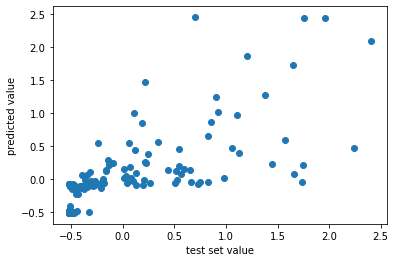

In [160]:
plt.scatter(y_test, predict)
plt.xlabel("test set value")
plt.ylabel("predicted value")
plt.show()

In [161]:
# 建立模型
model = LinearRegression()
RF_model = RandomForestRegressor(n_estimators=200, max_features='auto', oob_score=True)

#查看訓練測試結果，將運行8次random_state
L_rg_list = []; RF_rg_list = []
for i in range(8):
    x_train,x_test,y_train,y_test = train_test_split(xc,yc,test_size=0.2, random_state=i)
    #開始訓練
    model.fit(x_train,y_train)
    RF_model.fit(x_train,y_train)
    #開始預測
    predict = model.predict(x_test); L_rg_list.append(round(metrics.r2_score(y_test, predict),3))
    RF_predict = RF_model.predict(x_test); RF_rg_list.append(round(metrics.r2_score(y_test, RF_predict),3))

print('R^2 of linear reg: {}, mean: {}'.format(L_rg_list, round(np.mean(L_rg_list),3)))
print('R^2 of RF reg: {}, mean: {}'.format(L_rg_list, round(np.mean(RF_rg_list),3)))

print('多元回歸結果的多項式與截距')
print(model.coef_)
print(model.intercept_)

R^2 of linear reg: [0.606, 0.637, 0.632, 0.63, 0.557, 0.598, 0.585, 0.593], mean: 0.605
R^2 of RF reg: [0.606, 0.637, 0.632, 0.63, 0.557, 0.598, 0.585, 0.593], mean: 0.705
多元回歸結果的多項式與截距
[0.31508954 0.06356978 0.67602421]
0.026278150503795755


In [162]:
y_pred = model.predict(x_test)
len(y_pred)
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y_test)) )

My MAPE: 59.165214886957216


In [109]:
from joblib import dump,load
dump(model,'./LR_rg_model.sav')
dump(RF_model,'./RF_rg_model.sav')
dump(KNN_model,'./KNN_rg_model.sav')
dump(DT_model,'./DT_rg_model.sav')

['./DT_rg_model.sav']

In [110]:
loaded_model = load("LR_rg_model.sav")
loaded_RF_model = load("RF_rg_model.sav")
at=[[40000,55555,778787,60000]]
print(loaded_model.predict(at))

[847777.09433339]
